In [38]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from utils import *

In [56]:
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [40]:
df = pd.read_pickle('./20221111_df.pkl')

In [41]:
evt = get_event_date()

### 특정 날자에 나온 유저 수를 파악함으로써 신규 유저 및 관심을 가진 유저를 파악할 수 있고, 글 젠량과는 다르게 도배 목적의 글을 거를 수 있다.

In [42]:
user_date = df.groupby('time', as_index=False)['user'].nunique()

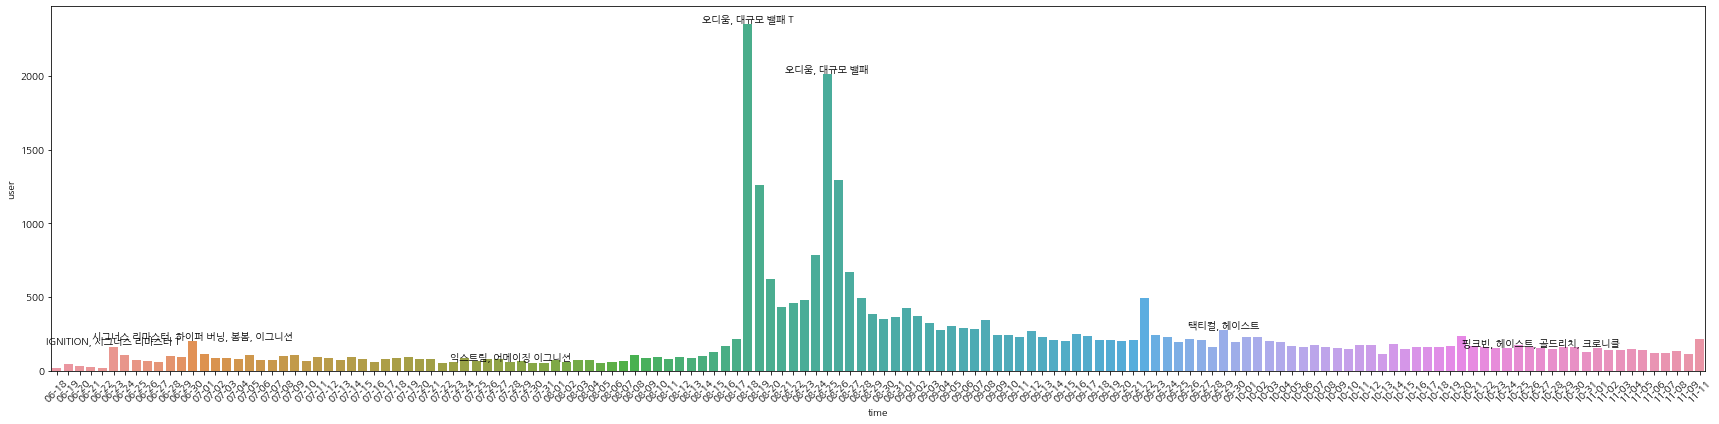

In [ ]:
plt.figure(figsize=(24, 6))
g = sns.barplot(data=user_date, x='time', y='user')
g.bar_label(g.containers[0], labels=[evt.get(txt.get_text(), "") for txt in g.get_xticklabels()])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.savefig("user_date.svg")
plt.show()

### 유저별 긍/부정 게시글의 수를 파악함으로써 극단적인 성향을 가려낼 수 있다. 또한, 전체적인 양상을 통해 크롤링 기간 동안 해당 게임의 운영 여부를 확인할 수 있다.

In [48]:
df['score'] = df[['pred', 'score']].apply(lambda x: -x.score if x.pred == '부정' else x.score, axis=1)

In [111]:
per_user = pd.DataFrame()
temp = df.groupby(['user'])['pred'].value_counts().to_dict()
per_user['user'] = df['user'].unique()
per_user['pos_count'] = per_user['user'].apply(lambda x: temp[(x, '긍정')] if (x, '긍정') in temp else 0)
per_user['neg_count'] = per_user['user'].apply(lambda x: temp[(x, '부정')] if (x, '부정') in temp else 0)
per_user = per_user.fillna(0)

In [116]:
per_user

,user,pos_count,neg_count
0,신사동현빈,1,1
1,Reformed,0,2
2,모르겟어요,2,7
3,먕먕누구야,1,1
4,밤샘2,2,6
...,...,...,...
12783,우헤해헤엥,1,0
12784,땡구네,0,1
12785,진이꼬야옹,1,0
12786,Benbenben,1,0


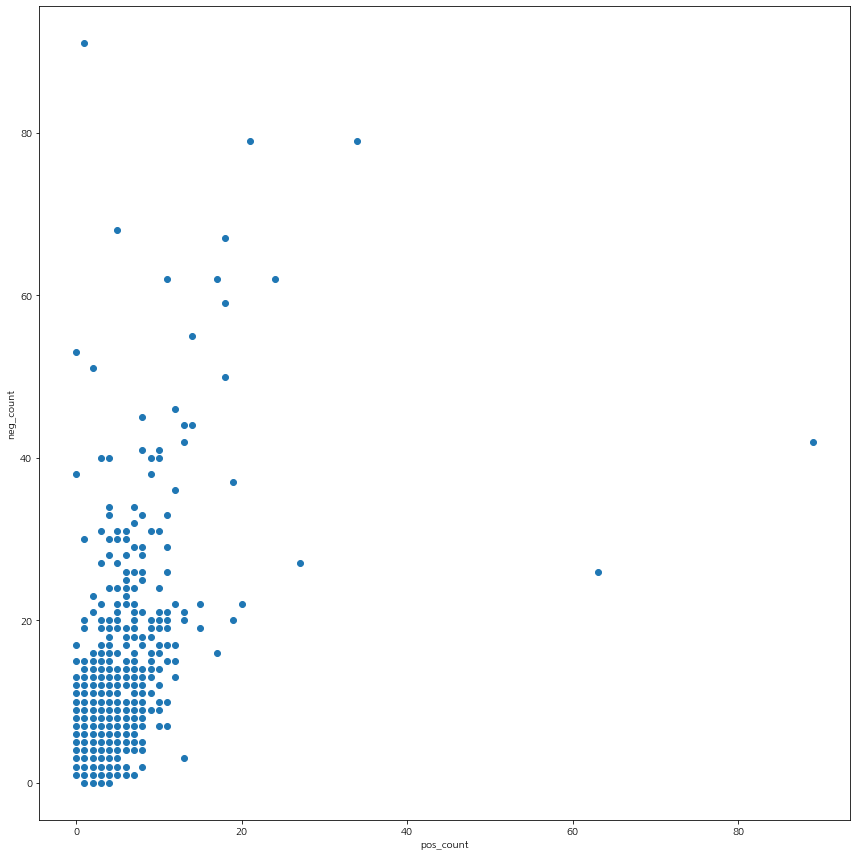

In [131]:
plt.figure(figsize=(12, 12))
dots = set(per_user.apply(lambda x: (x.pos_count, x.neg_count), axis=1))
plt.scatter(x=[i[0] for i in dots], y=[i[1] for i in dots])
plt.xlabel("pos_count")
plt.ylabel("neg_count")
plt.tight_layout()
plt.savefig('user_tend.svg')
plt.show()

In [59]:
per_user_date = df.groupby(['user', 'pred', 'time'], as_index=False)[['score']].mean()

In [61]:
per_user_date = per_user_date.sort_values(by='time')

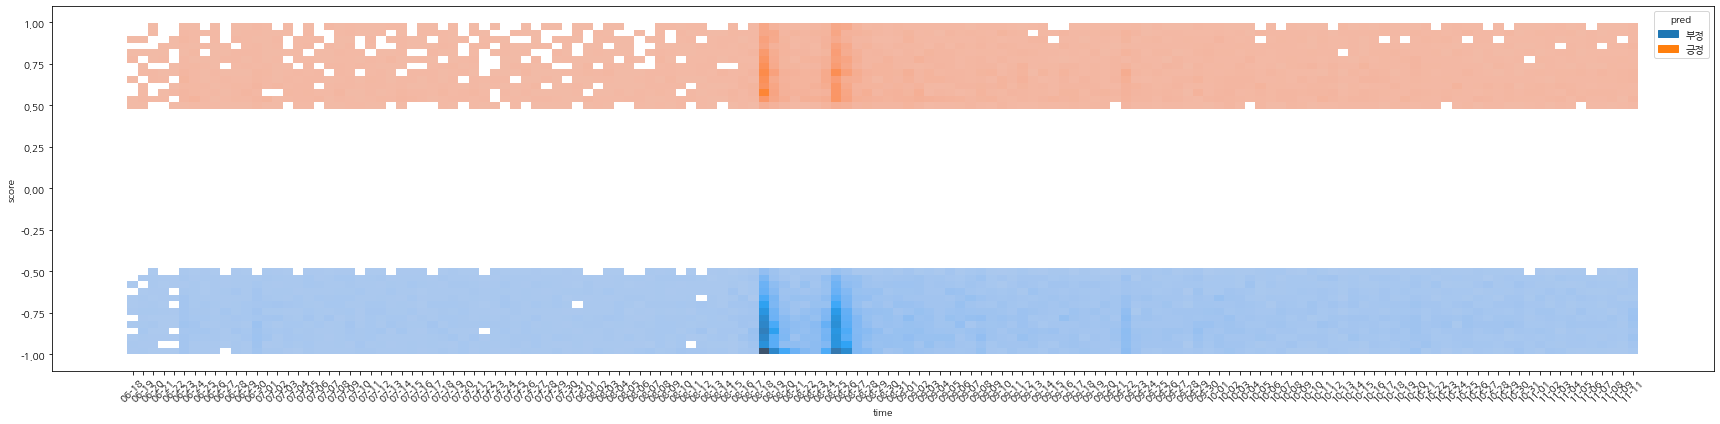

In [72]:
plt.figure(figsize=(24, 6))
g = sns.histplot(data=per_user, x='time', y='score', hue='pred', bins=50)
g.set_xticks(g.get_xticks())
g.set_xticklabels(per_user_date['time'].unique(), rotation=45)
plt.tight_layout()
plt.savefig('user_score.svg')
plt.show()